In [1]:
import pandas as pd
mvc = pd.read_csv('nypd_mvc_2018.csv')
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [2]:
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_key           57864 non-null  int64  
 1   date                 57864 non-null  object 
 2   time                 57864 non-null  object 
 3   borough              37218 non-null  object 
 4   location             53979 non-null  object 
 5   on_street            43903 non-null  object 
 6   cross_street         28615 non-null  object 
 7   off_street           13771 non-null  object 
 8   pedestrians_injured  57864 non-null  int64  
 9   cyclist_injured      57864 non-null  int64  
 10  motorist_injured     57864 non-null  int64  
 11  total_injured        57863 non-null  float64
 12  pedestrians_killed   57864 non-null  int64  
 13  cyclist_killed       57864 non-null  int64  
 14  motorist_killed      57864 non-null  int64  
 15  total_killed         57859 non-null 

In [3]:
#count number of null in each column
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [4]:
#count percentage of null in each column
null_count_pct = null_counts/mvc.shape[0]*100 #shape[0] is number of rows
null_count_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

In [5]:
mvc.shape

(57864, 26)

In [6]:
#create null count & perrcentage dataframe to compare
null_df = pd.DataFrame({'null_counts':null_counts,'null_count_pct':null_count_pct})
null_df

,null_counts,null_count_pct
unique_key,0,0.000000
date,0,0.000000
time,0,0.000000
borough,20646,35.680216
location,3885,6.714019
on_street,13961,24.127264
cross_street,29249,50.547836
off_street,44093,76.201092
pedestrians_injured,0,0.000000
cyclist_injured,0,0.000000


In [7]:
#rotate the dataframe row become columns & vice versa
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_count_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


In [8]:
#select column names with 'killed'
killed_cols = [col for col in mvc.columns if 'killed' in col ]
killed_cols

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

In [9]:
killed = mvc[killed_cols].copy()
killed

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
57859,0,0,0,0.0
57860,0,0,0,0.0
57861,0,0,0,0.0
57862,0,0,0,0.0


In [10]:
killed_manual_sum = killed.iloc[:,:3].sum(axis=1) #count row total killed, default as axis=0
killed_manual_sum

0        0
1        0
2        0
3        0
4        0
        ..
57859    0
57860    0
57861    0
57862    0
57863    0
Length: 57864, dtype: int64

In [11]:
killed_mask = killed_manual_sum != killed['total_killed']
killed_mask

0        False
1        False
2        False
3        False
4        False
         ...  
57859    False
57860    False
57861    False
57862    False
57863    False
Length: 57864, dtype: bool

In [12]:
# identify which row total_killed not equal
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [13]:
#catagorize into two : Nan & null
import numpy as np
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(),killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed']!=killed_manual_sum,np.nan)
killed.loc[[3508,20163,22046,48719,55148,55699]]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


In [14]:
injured = [c for c in mvc.columns if 'injured' in c]
injured = mvc[injured].copy()
injured.head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [15]:
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured_manual_sum

0        0
1        0
2        1
3        0
4        0
        ..
57859    3
57860    0
57861    1
57862    0
57863    0
Length: 57864, dtype: int64

In [16]:
injured['total_injured'] = injured['total_injured'] .mask(injured['total_injured'].isnull(),injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured']!=injured_manual_sum,np.nan)

In [17]:
summary = {'injured':[mvc['total_injured'].isnull().sum(),injured['total_injured'].isnull().sum()],'killed':[mvc['total_killed'].isnull().sum(),killed['total_killed'].isnull().sum()]}

In [18]:
print(pd.DataFrame(summary,index=['before','after']))

        injured  killed
before        1       5
after        21       1


In [19]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

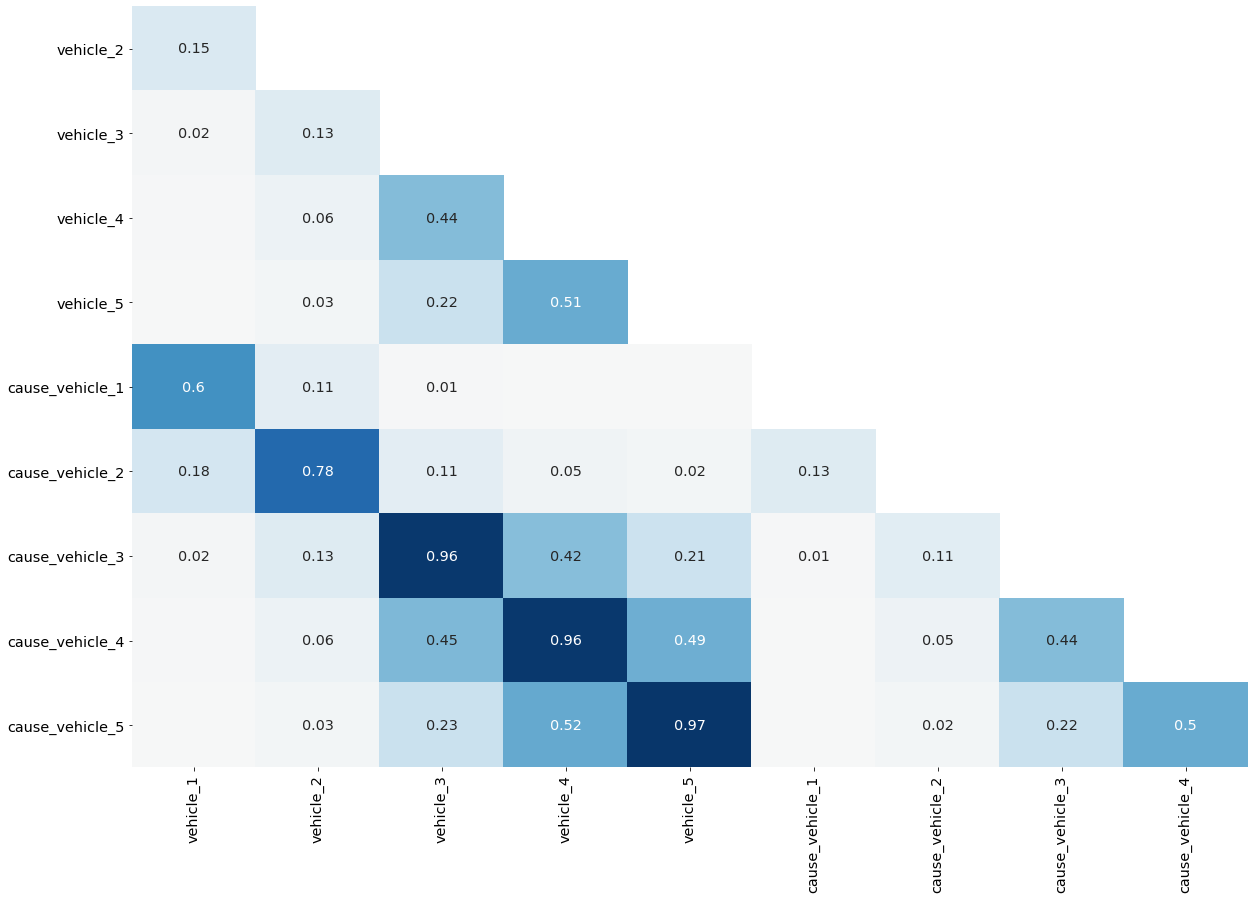

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_null_correlations(df):
    #create a correlation matrix only for columns at least one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum()>0]
    missing_corr =  df[cols_with_missing_vals].isnull().corr()
    
    #create a mask to avoid repeated value and make the plot easier to read
    missing_corr = missing_corr.iloc[1:,:-1]
    mask = np.triu(np.ones_like(missing_corr),k=1)
    
    #plot a heatmap of values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

In [21]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']
vc_null_data = []
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v,v_null,c_null])
vc_null_df = pd.DataFrame(vc_null_data,columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [22]:
#convert dataframe to single columns
v_cols = [c for c in mvc.columns if c.startswith('vehicle')]
top10_vehicles = mvc[v_cols].stack().value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [23]:
cause_cols = [c for c in mvc.columns if 'cause' in c]
top10_cause = mvc[cause_cols].stack().value_counts().head(10)
top10_cause

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

In [24]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
print(summary_before)
# for v in range(1,6):
#     v_col = 'vehicle_{}'.format(v)
#     c_col = 'cause_vehicle_{}'.format(v)
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()

    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")

summary_after = summarize_missing()
print(summary_after)

   vehicle_number  vehicle_missing  cause_missing
0               1              204             24
1               2             3793            223
2               3              242             24
3               4               50              3
4               5               10              0
   vehicle_number  vehicle_missing  cause_missing
0               1                0              0
1               2                0              0
2               3                0              0
3               4                0              0
4               5                0              0


In [26]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


In [25]:
sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
print(null_before)
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(),sup_data[col])
null_after = mvc[location_cols].isnull().sum()
print(null_after)

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64
location         77
on_street     13734
off_street    36131
borough         232
dtype: int64
